## Chapter 1

###What are Generative Adversarial Networks

Генеративные состязательные сети, или сокращенно GAN, представляют собой подход к генеративному моделированию.
с использованием методов глубокого обучения, таких как сверточные нейронные сети.

#### Генеративное моделирование - это
задача обучения без учителя в машинном обучении, которая включает в себя автоматическое обнаружение и
изучение закономерностей или закономерностей во входных данных таким образом, чтобы модель могла быть использована для генерировать или выводить новые примеры, которые, вероятно, могли быть взяты из исходного набора данных.

GAN - это умный способ обучения генеративной модели, представляющий проблему как контролируемую
проблема обучения с двумя подмоделями:
- модель генератора, которую мы обучаем для создания новых примеры и 
- модель дискриминатора, которая пытается классифицировать примеры как реальные (из
домен) или поддельный (сгенерированный).

Две модели обучаются вместе в состязательной игре с нулевой суммой, до тех пор, пока модель дискриминатора не обманут примерно половину времени, то есть модель генератора генерирует правдоподобные примеры.


**Модель обучена путем демонстрации примеров входных данных, прогнозирования выходных данных и корректировки модели для того чтобы сделать результаты более похожими на ожидаемые.**

1. Генератор. Модель, которая используется для создания новых правдоподобных примеров из проблемы
домен.
2. Дискриминатор. Модель, которая используется для классификации примеров как реальных (из предметной области) или поддельный (сгенерированный).

Генеративные состязательные сети основаны на теоретико-игровом сценарии, в котором
сеть генератора должна конкурировать с противником. Генераторная сеть непосредственно производит образцы. Его противник, дискриминаторная сеть, пытается
различать выборки, взятые из обучающих данных, и выборки, взятые из генератор.


#### Модель генератора
Модель генератора принимает случайный вектор фиксированной длины в качестве входных данных и генерирует выборку в домен, например изображение. Вектор выбирается случайным образом из гауссова распределения и имеет вид используется в качестве затравки или источника шума для генеративного процесса. Чтобы было ясно, вход - это вектор случайные числа. Это не изображение или сплющенное изображение и не имеет другого значения, кроме
значение, применяемое моделью генератора. После тренировки точки в этом многомерном векторе
пространство будет соответствовать точкам в проблемной области, образуя сжатое представление
распределения данных. Это векторное пространство называется скрытым пространством или векторным пространством, состоит из скрытых переменных.

Скрытые переменные или скрытые переменные - это те переменные, которые важны для домена, но не наблюдаются напрямую.
Скрытая переменная - это случайная величина, которую мы не можем наблюдать напрямую.

Мы часто называем скрытые переменные или скрытое пространство проекцией или сжатием
распределение данных. То есть скрытое пространство обеспечивает сжатие или высокоуровневые концепции
наблюдаемые необработанные данные, такие как распределение входных данных. 

####Модель дискриминатора
Модель дискриминатора берет пример из проблемной области в качестве входных данных (реальных или сгенерированных).
и предсказывает метку двоичного класса, настоящую или фальшивую (сгенерированную). Настоящий пример исходит из
набор обучающих данных. Сгенерированные примеры выводятся моделью генератора. Дискриминатор это нормальная классификационная модель.

После процесса обучения модель дискриминатора отбрасывается, так как нас интересует
генератор. 

Генератор генерирует партию образцов, и они вместе с реальными примеры из домена предоставляются дискриминатору и классифицируются как настоящие или поддельные.

Затем дискриминатор обновляется, чтобы лучше различать реальные и поддельные образцы.

В следующем раунде, что важно, генератор обновляется в зависимости от того, насколько хорошо или нет
сгенерированные выборки обманули дискриминатор.

## Chapter2

###How to Develop Deep Learning Models

Upsampling
повышающая дискретизация слой, который просто удваивает размеры входного и транспонированного сверточного слоя который выполняет операцию обратной свертки.

Транспонированный сверточный слой сложнее простого слоя с повышающей дискретизацией. Просто способ думать об этом заключается в том, что он одновременно выполняет операцию повышения дискретизации и интерпретирует грубую
входные данные для заполнения деталей при повышении дискретизации

##Chapter 4


###How to Implement the GAN Training

Внешний цикл алгоритм включает в себя итерацию шагов для обучения моделей в архитектуре. Один цикл
через этот цикл не эпоха: это единичное обновление, состоящее из определенных пакетных обновлений для
модели дискриминатора и генератора. Эпоха определяется как один цикл через набор обучающих данных,
где образцы в наборе обучающих данных используются для обновления весов модели в мини-пакетах.
```
# gan training algorithm
def train_gan(dataset, n_epochs, n_batch):
    batches_per_epoch = int(len(dataset) / n_batch)
    n_steps = batches_per_epoch * n_epochs
    for i in range(n_steps):
        # update the discriminator model
        # ...
        # update the generator model
        # ...
```

Loss:

Модель дискриминатора будет обучена предсказывать вероятность реальности данного входное изображение, которое можно интерпретировать как метку класса class = 0 для подделки и class = 1 для реального.

Генератор обучен максимизировать дискриминатор, предсказывающий высокую вероятность класса = 1
для сгенерированных (поддельных) изображений.

Например, если дискриминатор предсказывает низкую среднюю вероятность быть реальным для
пакет сгенерированных изображений, то это приведет к распространению большого сигнала ошибки в обратном направлении в генератор с учетом ожидаемой вероятности для образцов было 1,0 для реального. Этот большой
сигнал ошибки, в свою очередь, приводит к относительно большим изменениям в генераторе, чтобы, надеюсь, улучшить его возможность создания поддельных образцов в следующей партии.

https://github.com/soumith/ganhacks
hacks more stable train gans:
- downsample, stride of (1,1) to change it to (2,2)
- Conv2DTranspose
- Use Leaky ReLU
- Use Batch Normalization
- Use Gaussian Weight Initialization
- Use Adam Stochastic Gradient Descent
- Scale Images to the Range [-1,1]
Рекомендуется использовать функцию активации гиперболического тангенса в качестве выхода из
модель генератора. Таким образом, также рекомендуется, чтобы реальные изображения, используемые для обучения дискриминатора масштабируются так, чтобы их значения пикселей находились в диапазоне [-1,1]. Это сделано для того, чтобы дискриминатор всегда будет получать изображения в качестве входных, настоящие и поддельные, которые имеют значения пикселей в одном и том же диапазоне.

-Separate Batches of Real and Fake Images
Модель дискриминатора обучается с использованием стохастического градиентного спуска с минипакетами. В
Лучше всего обновлять дискриминатор отдельными партиями реальных и поддельных изображений.
чем объединение реальных и поддельных изображений в один пакет
```
X_real, y_real = ...
discriminator.train_on_batch(X_real, y_real)
X_fake, y_fake = ...
discriminator.train_on_batch(X_fake, y_fake)
```
- Use Label Smoothing
Рекомендуется использовать программные метки, например значения немного больше или меньше.
чем 1,0 или чуть больше 0,0 для реальных и поддельных изображений соответственно, где вариация для
каждое изображение случайное.
```
# example of smoothing class=1 to [0.7, 1.2]
def smooth_positive_labels(y):
return y - 0.3 + (random(y.shape) * 0.5)
```
- Use Noisy Labels
создание 1000 образцов реальных (класс = 1) этикеток и их переворачивание с вероятностью 5%, затем
проделать то же самое с 1000 образцами поддельных (класс = 0) этикеток

## Chapter 6(GAN Basics)



In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

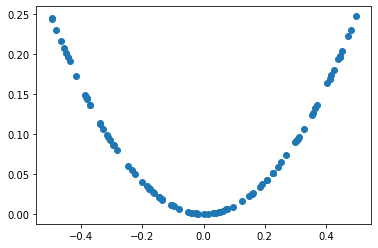

In [ ]:
def func(n: int) -> int:
    x = np.random.rand(n)-0.5
    xx = x*x
    x = x.reshape(n,1)
    xx = xx.reshape(n,1)
    data = np.hstack((x, xx))
    return data

data = func(100)
plt.scatter(data[:, 0], data[:, 1])

In [ ]:
def discriminator(input_num: int = 2):
    

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 25),
    nn.ReLU(),
    nn.Linear(25, 1),
    nn.Sigmoid()
)

Sequential(
  (0): Linear(in_features=2, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
68

In [ ]:
https://github.com/soumith/ganhacks


In [ ]:
https://gereshes.com/2019/06/24/how-to-transfer-a-simple-keras-model-to-pytorch-the-hard-way/
https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
https://towardsdatascience.com/build-a-super-simple-gan-in-pytorch-54ba349920e4
https://medium.com/@jetbootsmaker/gan-in-pytorch-5ad6dd89c9a3